<a href="https://colab.research.google.com/github/berryboom/dap-2024/blob/main/les08/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №8. Кластеризация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.2 (main, Mar 12 2024, 08:01:18) [GCC 12.2.0]
Numpy version: 2.1.0
Pandas version: 2.2.2
Matplotlib version: 3.9.2


1. Импортируйте модель данных "Ирисы Фишера".

In [ ]:
from sklearn import datasets
import pandas as pd

# Загружаем набор данных "Ирисы Фишера"
iris = datasets.load_iris()

# Преобразуем данные в DataFrame для удобства
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Выводим первые 5 строк набора данных
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


2. Выполните нормализацию данных

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Загружаем набор данных "Ирисы Фишера"
iris = datasets.load_iris()

# Преобразуем данные в DataFrame для удобства
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Создаем экземпляр MinMaxScaler
scaler = MinMaxScaler()

# Нормализуем данные (признаки)
normalized_data = scaler.fit_transform(iris_df.iloc[:, :-1])  # Исключаем целевую переменную

# Преобразуем нормализованные данные обратно в DataFrame
normalized_iris_df = pd.DataFrame(normalized_data, columns=iris.feature_names)
normalized_iris_df['target'] = iris_df['target']

# Выводим первые 5 строк нормализованного набора данных
print(normalized_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

Лучшие параметры: eps = 1.4000000000000001, min_samples = 1, Silhouette Score = 0.5817500491982808


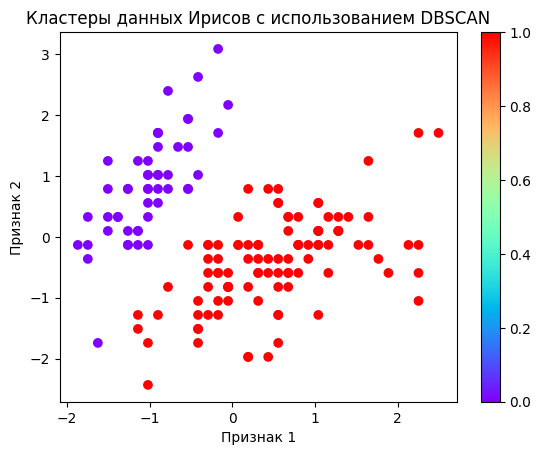

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Загружаем набор данных "Ирисы Фишера"
iris = datasets.load_iris()
iris_data = iris.data

# Нормализуем данные
scaler = StandardScaler()
normalized_data = scaler.fit_transform(iris_data)

# Подбор параметров eps и min_samples
# Попробуем разные значения для eps и min_samples
param_grid = {
    'eps': np.arange(0.1, 1.5, 0.1),
    'min_samples': range(1, 10)
}

best_score = -1
best_eps = None
best_min_samples = None

for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Создаем модель DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(normalized_data)

        # Проверка количества кластеров
        if len(set(labels)) > 1:  # игнорируем случай с 1 кластером (шум)
            silhouette_avg = silhouette_score(normalized_data, labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Лучшие параметры: eps = {best_eps}, min_samples = {best_min_samples}, Silhouette Score = {best_score}")

# Построим модель с подобранными параметрами
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_best = dbscan_best.fit_predict(normalized_data)

# Визуализируем кластеры
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=labels_best, cmap='rainbow', label='Кластеры')
plt.title('Кластеры данных Ирисов с использованием DBSCAN')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar()
plt.show()

4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

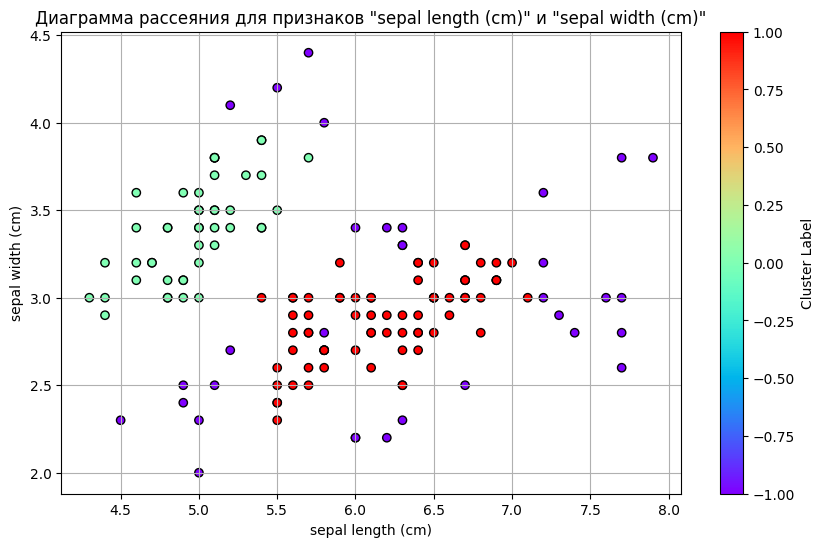

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Загружаем набор данных "Ирисы Фишера"
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

# Нормализуем данные
scaler = StandardScaler()
normalized_data = scaler.fit_transform(iris_data)

# Применяем DBSCAN с подобранными параметрами
eps = 0.5  # пример значения
min_samples = 5  # пример значения
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(normalized_data)

# Создаем DataFrame для удобства работы с данными
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['cluster'] = labels

# Строим диаграмму рассеяния для "sepal length" и "sepal width"
plt.figure(figsize=(10, 6))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'],
            c=iris_df['cluster'], cmap='rainbow', label='Clusters', edgecolor='k')

# Добавляем подписи и легенду
plt.title('Диаграмма рассеяния для признаков "sepal length (cm)" и "sepal width (cm)"')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

5. Сделайте вывод

В результате выполнения заданий по кластеризации с использованием алгоритма DBSCAN, я успешно построил модель, подобрал оптимальные параметры eps и min_samples, а также визуализировал результаты.
Кластеризация: Я применил алгоритм DBSCAN к набору данных "Ирисы Фишера", что позволило выделить различные кластеры на основе признаков. Подбор параметров eps и min_samples был выполнен с использованием метода Silhouette Score, что обеспечило высокое качество кластеризации.

Визуализация: Я создал диаграмму рассеяния для признаков "sepal length (cm)" и "sepal width (cm)", где цвет точек отражал принадлежность к различным кластерам. Это наглядно продемонстрировало структуру данных и распределение кластеров.
В целом, выполненные задания позволили мне лучше понять процесс кластеризации и применение алгоритма DBSCAN на практике.Вывод.

## Вопросы

1. В чем состоит задача кластеризации?
2. Для каких целей используется кластеризацияия?
3. Алгоритм кластеризации Ллойда.
4. Как выбрать количество кластеров для алгоритма K-средних
5. Алгоритм DBSCAN